In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Project Description:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Importing Dataset:

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


Exploratory Data Analysis:

For finding maximum temperature of the next day:

In [4]:
df.shape

(7752, 25)

There are 7752 rows and 25 columns present in the dataset.

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

There are two types of data present in the dataset i.e., float64 and object.

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

These are the columns present in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


This gives the brief information about the name of the columns, non-null values , data type and memory usage.

In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Null values are present in all the columns except lat, lon, DEM, Slope,Solar radiation columns present in the dataset.

<AxesSubplot:>

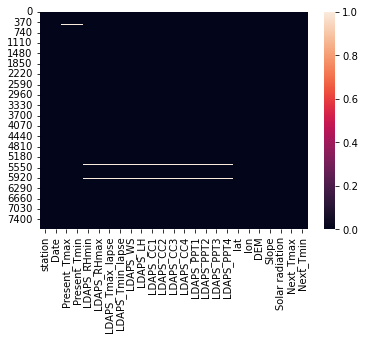

In [8]:
#Let's check Null values using heatmap
sns.heatmap(df.isnull())

In [13]:
df["Date"]=pd.to_datetime(df.Date,format='%d-%m-%Y')

In [14]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [10]:
df["station"]=df["station"].fillna(df["station"].mean())
df["Present_Tmax"]=df["Present_Tmax"].fillna(df["Present_Tmax"].mean())
df["Present_Tmin"]=df["Present_Tmin"].fillna(df["Present_Tmin"].mean())
df["LDAPS_RHmin"]=df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].mean())
df["LDAPS_RHmax"]=df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].mean())
df["LDAPS_Tmax_lapse"]=df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].mean())
df["LDAPS_Tmin_lapse"]=df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].mean())
df["LDAPS_WS"]=df["LDAPS_WS"].fillna(df["LDAPS_WS"].mean())
df["LDAPS_LH"]=df["LDAPS_LH"].fillna(df["LDAPS_LH"].mean())
df["LDAPS_CC1"]=df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].mean())
df["LDAPS_CC2"]=df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].mean())
df["LDAPS_CC3"]=df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].mean())
df["LDAPS_CC4"]=df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].mean())
df["LDAPS_PPT1"]=df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].mean())
df["LDAPS_PPT2"]=df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].mean())
df["LDAPS_PPT3"]=df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].mean())
df["LDAPS_PPT4"]=df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].mean())
df["Next_Tmax"]=df["Next_Tmax"].fillna(df["Next_Tmax"].mean())
df["Next_Tmin"]=df["Next_Tmin"].fillna(df["Next_Tmin"].mean())


In [11]:
df["Date"]=df["Date"].fillna(method="ffill")

In [12]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

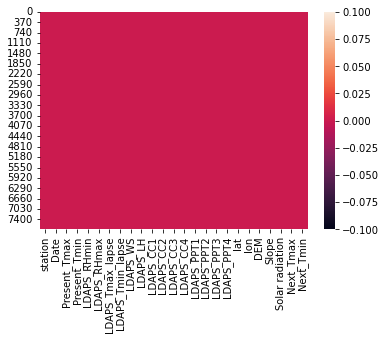

In [12]:
#Let's check null values using heatmap.
sns.heatmap(df.isnull())

we can clearly see that there are no null values present in the dataset.

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7747    False
7748    False
7749    False
7750    False
7751    False
Length: 7752, dtype: bool

In [11]:
df.duplicated().sum()

0

There are no duplicate values present in the dataset.

In [15]:
for i in df.columns:
    print(df[i].value_counts())

13.0    312
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
1.0     310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64
2017-08-30    27
2016-07-18    25
2016-07-25    25
2016-07-24    25
2016-07-23    25
              ..
2014-08-09    25
2014-08-08    25
2014-08-07    25
2014-08-06    25
2015-07-31    25
Name: Date, Length: 310, dtype: int64
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 168, dtype: int64
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 156, dtype: int64
56.759372    75
77.030350     2
98.524734     2
19.794666     2
51.810596     2
           

These are the value counts present in all the columns present in the dataset.

In [20]:
df["Next_Tmax"].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.5      1
38.7      1
37.4      1
20.9      1
21.8      1
Name: Next_Tmax, Length: 184, dtype: int64

In [21]:
df["Next_Tmin"].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
28.2      1
14.9      1
29.5      1
13.4      1
12.9      1
Name: Next_Tmin, Length: 158, dtype: int64

In [22]:
df["Next_Tmax"].nunique

<bound method IndexOpsMixin.nunique of 0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64>

In [23]:
df["Next_Tmax"].nunique()

184

184 unique values present in this column Next_Tmax.

In [24]:
df["Next_Tmin"].nunique()

158

158 unique values are present in this column Next_Tmin

In [25]:
df["Next_Tmax"].nunique

<bound method IndexOpsMixin.nunique of 0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7747    28.3
7748    28.6
7749    27.8
7750    17.4
7751    38.9
Name: Next_Tmax, Length: 7752, dtype: float64>

In [26]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


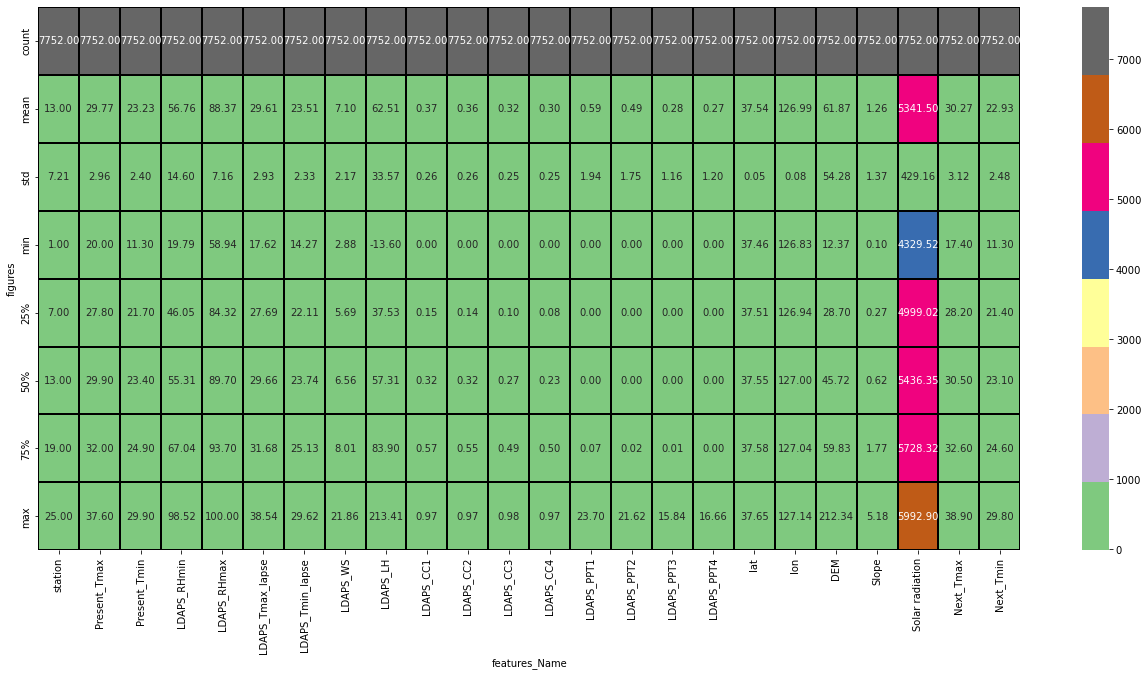

In [23]:
#let us visualize by using heatmap
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,linewidth=0.2,linecolor="black",fmt="0.2f",cmap="Accent")
plt.ylabel("figures")
plt.xlabel("features_Name")
plt.show()

This gives the stastical summary of numerical columns.The counts of all the columns are same which means there are no missing values in the dataset.The summary of the dataset looks perfect since there is no negative/invalid values present.

The mean value is greater than the median in LDAPS_RHmin, LDAPS_WS, LDAPS_LH, LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2 ,LDAPS_PPT3, LDAPS_PPT4, DEM, slope columns which means the data is skewed to right in these columns. 

The mean value is less than the median in Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse,lat,lon,solar radiation,Next_Tmax,Next_Tmin columns  which means the data is skewed to left in these columns. 

The mean and median values are same in station column which means the data looks normal and data is not skewed.

By summarizing the data we can observe there is a huge differences between 75% and max,hence there are outliers present in the data.

We can also notice that the standard deviation, minimum value and 25% percentile values from this describe method.

Data Visualization:

In [24]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

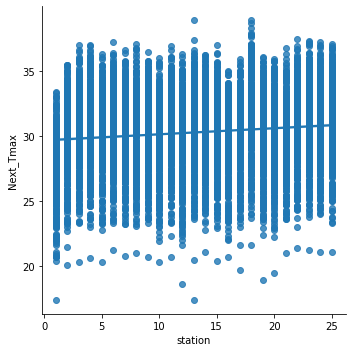

In [25]:
sns.lmplot(x="station",y="Next_Tmax",data=df,palette="icefire")

The station column has not a high positive relation with Next_Tmax

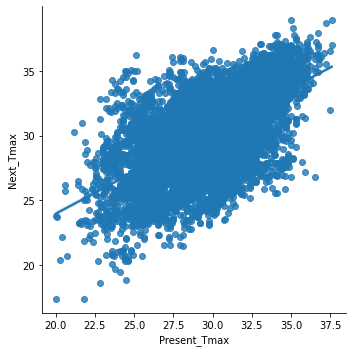

In [27]:
sns.lmplot(x="Present_Tmax",y="Next_Tmax",data=df,palette="icefire")

Present_Tmax has a positive relation with Next_Tmax

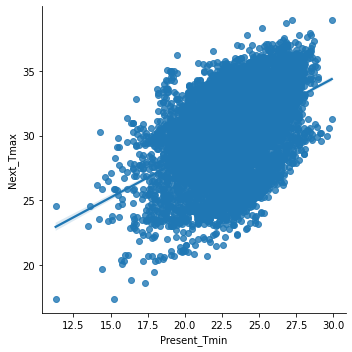

In [28]:
sns.lmplot(x="Present_Tmin",y="Next_Tmax",data=df,palette="icefire")

Present_Tmin  has a positive relation with Next_Tmax 

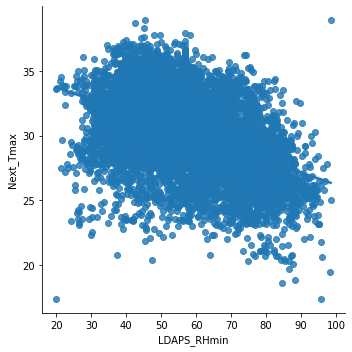

In [29]:
sns.lmplot(x="LDAPS_RHmin",y="Next_Tmax",data=df,palette="icefire")

LDAPS_RHmin has not having a relation with Next_Tmax

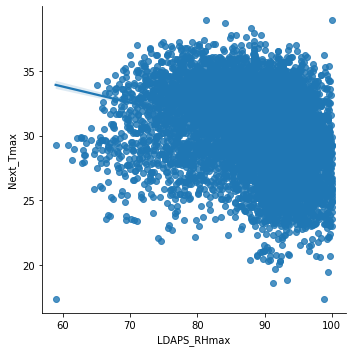

In [30]:
sns.lmplot(x="LDAPS_RHmax",y="Next_Tmax",data=df,palette="icefire")

LDAPS_RHmax has a negative relation with Next_Tmax.

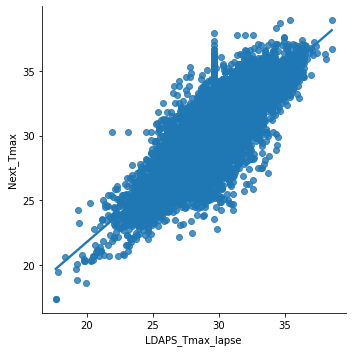

In [31]:
sns.lmplot(x="LDAPS_Tmax_lapse",y="Next_Tmax",data=df,palette="icefire")

LDAPS_Tmax_lapse  has a positive relation with Next_Tmax

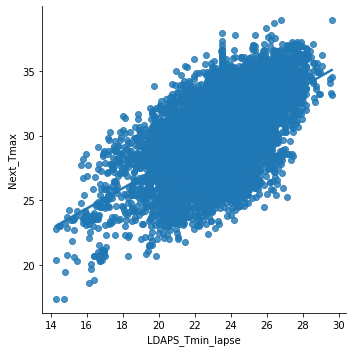

In [32]:
sns.lmplot(x="LDAPS_Tmin_lapse",y="Next_Tmax",data=df,palette="icefire")

LDAPS_Tmin_lapse  has a positive relation with Next_Tmax

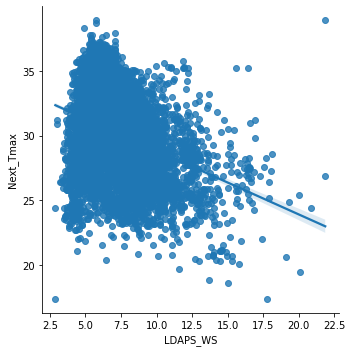

In [33]:
sns.lmplot(x="LDAPS_WS",y="Next_Tmax",data=df,palette="icefire")

LDAPS_WS has a negative relation with Next_Tmax

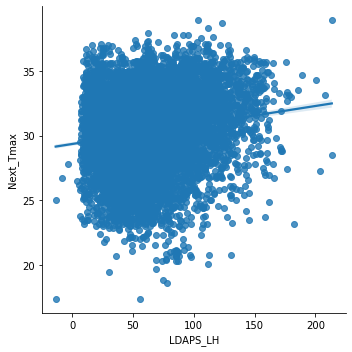

In [34]:
sns.lmplot(x="LDAPS_LH",y="Next_Tmax",data=df,palette="icefire")

LDAPS_LH has not a high positive relation with Next_Tmax

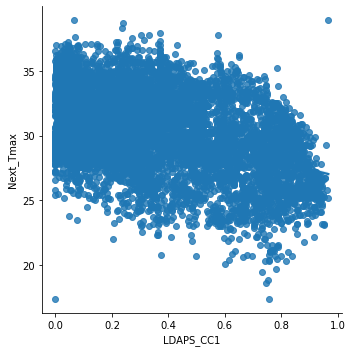

In [35]:
sns.lmplot(x="LDAPS_CC1",y="Next_Tmax",data=df,palette="icefire")

LDAPS_CC1 has not having a relation with Next_Tmax.

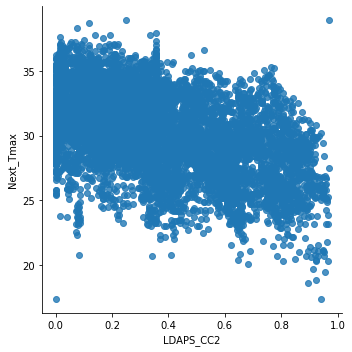

In [36]:
sns.lmplot(x="LDAPS_CC2",y="Next_Tmax",data=df,palette="icefire")

LDAPS_CC2 has not having a relation with Next_Tmax.

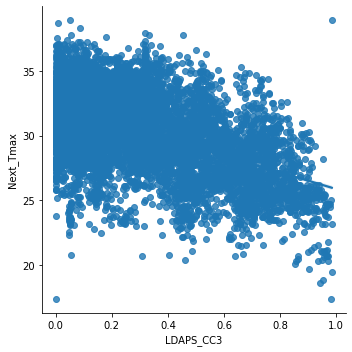

In [37]:
sns.lmplot(x="LDAPS_CC3",y="Next_Tmax",data=df,palette="icefire")

LDAPS_CC3 has not having a relation with Next_Tmax.

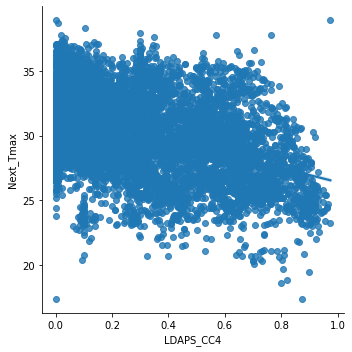

In [38]:
sns.lmplot(x="LDAPS_CC4",y="Next_Tmax",data=df,palette="icefire")

LDAPS_CC4 has a negative  relation with Next_Tmax.

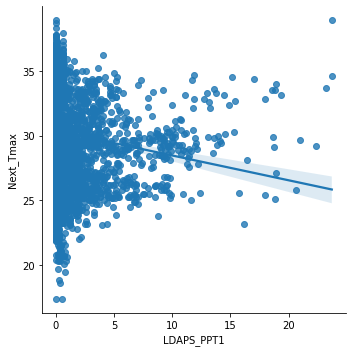

In [39]:
sns.lmplot(x="LDAPS_PPT1",y="Next_Tmax",data=df,palette="icefire")

LDAPS_PPT1 has a negative relation with Next_Tmax.

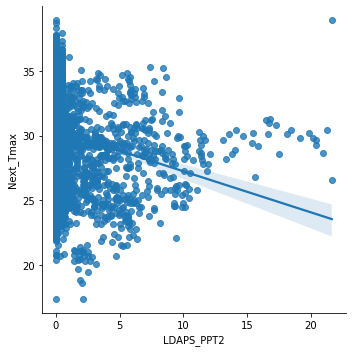

In [40]:
sns.lmplot(x="LDAPS_PPT2",y="Next_Tmax",data=df,palette="icefire")

LDAPS_PPT2 has a negative relation with Next_Tmax.

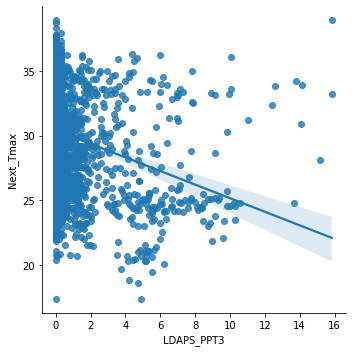

In [41]:
sns.lmplot(x="LDAPS_PPT3",y="Next_Tmax",data=df,palette="icefire")

LDAPS_PPT3 has a negative relation with Next_Tmax.

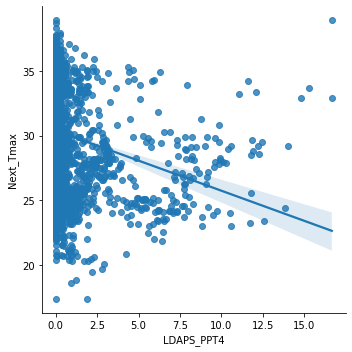

In [42]:
sns.lmplot(x="LDAPS_PPT4",y="Next_Tmax",data=df,palette="icefire")

LDAPS_PPT4 has a negative relation with Next_Tmax.

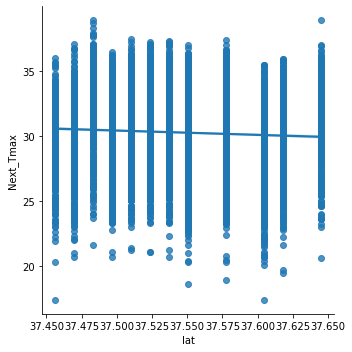

In [43]:
sns.lmplot(x="lat",y="Next_Tmax",data=df,palette="icefire")

The lat column data is following a constant trend according to Next_Tmax column.

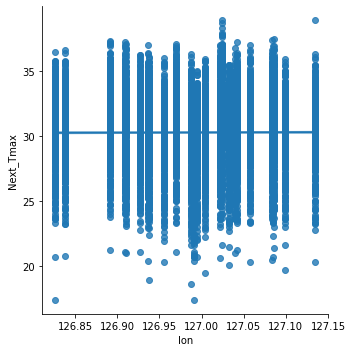

In [44]:
sns.lmplot(x="lon",y="Next_Tmax",data=df,palette="icefire")

The lon column data is following a constant trend according to Next_Tmax column.

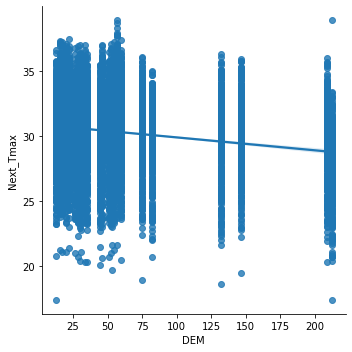

In [45]:
sns.lmplot(x="DEM",y="Next_Tmax",data=df,palette="icefire")

The DEM column has a negative relation with Next_Tmax.

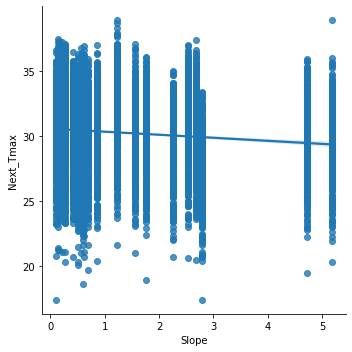

In [46]:
sns.lmplot(x="Slope",y="Next_Tmax",data=df,palette="icefire")

The Slope column has a negative relation with Next_Tmax.

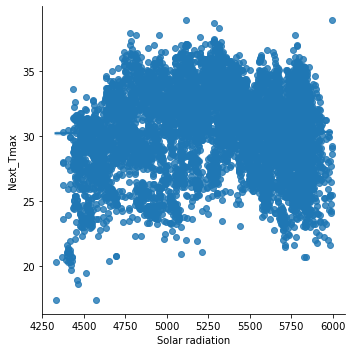

In [47]:
sns.lmplot(x="Solar radiation",y="Next_Tmax",data=df,palette="icefire")

Solar radiation has not having a relation with Next_Tmax.

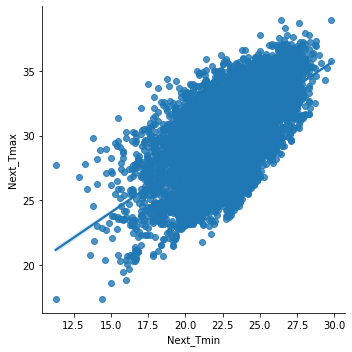

In [48]:
sns.lmplot(x="Next_Tmin",y="Next_Tmax",data=df,palette="icefire")

Next_Tmin has not a high positive relation with Next_Tmax column.

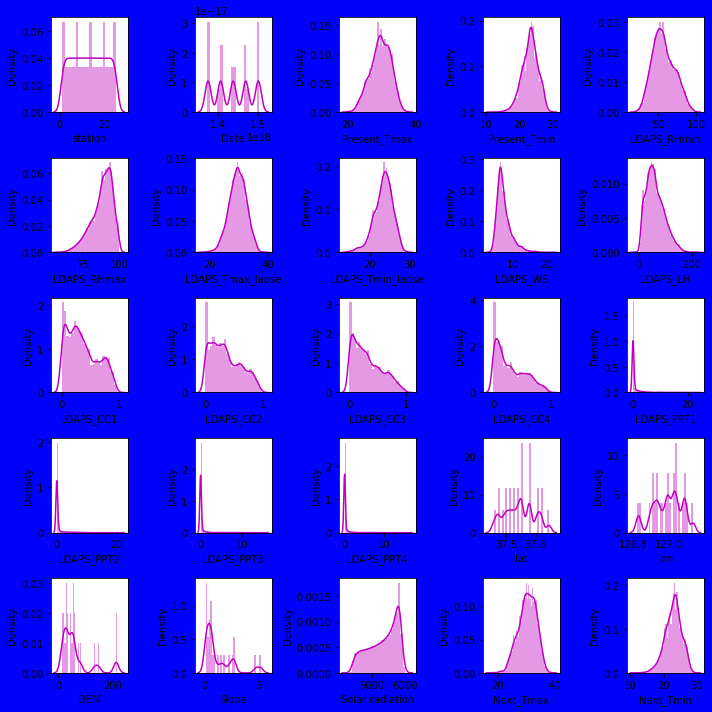

In [27]:
#let's visualize how the data has been distributed in all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
for column in df.columns:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

The columns LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2, LDAPS_PPT3,LDAPS_PT4 is right skewed.

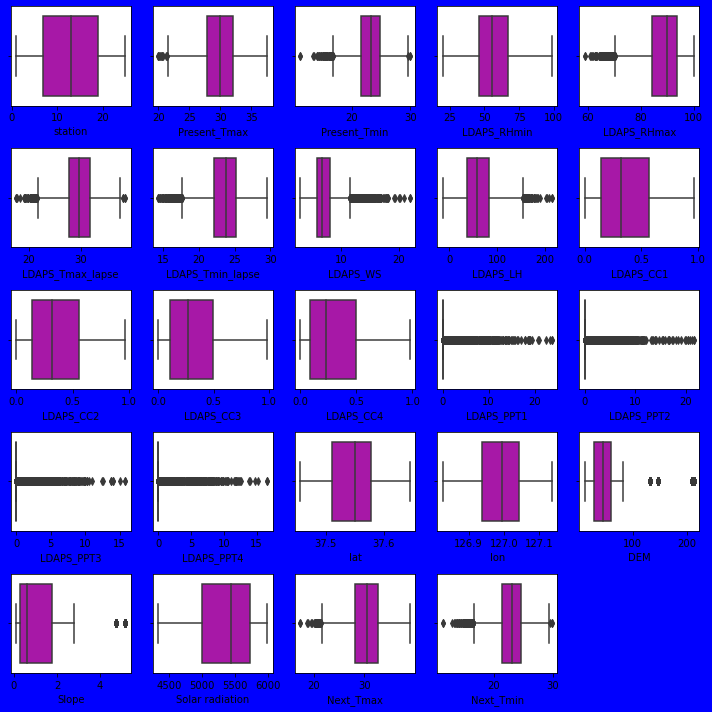

In [29]:
#let's visualize the data to check the outliers by plotting boxplot in all  the columns.
plt.figure(figsize=(10,10),facecolor="blue")
plotnumber=1
a=df[["station",'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]
for column in a:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
    plt.tight_layout()

The columns Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin have outliers.

In [30]:
from scipy.stats import zscore
a=df[['station','Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']]
z_score=zscore(a)
b=np.abs(z_score)
b

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.664315,0.361326,0.759529,0.102515,0.383078,0.524889,0.216663,0.128382,0.206966,0.516243,...,0.276489,0.240636,0.224453,1.189286,0.005000,2.772243,1.115004,1.517935,0.376282,0.697599
1,1.525622,0.721084,0.676296,0.308027,0.311586,0.080895,0.223848,0.646994,0.314841,0.548557,...,0.276489,0.240636,0.224453,1.189286,0.511177,0.315157,0.542158,1.229950,0.072097,0.174064
2,1.386929,0.619608,0.031188,0.552814,0.614982,0.162936,0.451210,0.441604,1.249283,0.610450,...,0.276489,0.240636,0.224453,0.653021,0.838510,0.526218,0.723133,1.216534,0.264260,0.389744
3,1.248236,0.754909,0.072805,0.101426,1.133054,0.031092,0.079874,0.666247,0.095997,0.583539,...,0.276489,0.240636,0.224453,1.991696,0.385280,0.297588,0.932424,1.201176,0.456422,0.550832
4,1.109544,0.551957,0.551446,0.040098,0.248765,0.170325,0.011187,0.627154,1.354409,0.832287,...,0.276489,0.240636,0.224453,0.118743,1.807917,0.494322,0.548433,1.207205,0.296287,0.174064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.386929,2.187892,2.549048,2.056591,1.328126,1.112066,2.029679,0.436683,0.284622,1.297018,...,0.276489,0.240636,0.224453,0.149390,1.263971,0.852681,0.803915,2.093040,0.632499,1.946031
7748,1.525622,2.187892,2.299348,2.241619,1.548184,0.887662,2.047744,0.255421,0.454749,1.274658,...,0.276489,0.240636,0.224453,0.417522,1.037356,0.821213,0.755095,2.104553,0.536418,1.664127
7749,1.664315,2.221718,2.424198,2.317504,1.555342,0.570780,2.137962,0.088072,1.591397,1.224577,...,0.276489,0.240636,0.224453,0.417522,0.269384,0.779043,0.719338,2.074325,0.792634,2.227935
7750,0.000000,3.304127,4.962817,2.532517,4.113443,4.087857,3.959146,1.939757,2.267499,1.412018,...,0.276489,0.240636,0.224453,1.758184,2.082302,0.911963,0.845455,2.358212,4.123453,4.684525


In [31]:
#The data where the outliers are present
np.where(b>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))

In [33]:
#Now removing the data above zscore
df1=df[(b<3).all(axis=1)]

In [34]:
df1

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017-08-30,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,2017-08-30,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [35]:
print("Data loss percentage:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage: 11.06811145510836


Data loss percentage after removing outliers is 11.06%

In [12]:
#checking skewness in all the columns.
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_PPT1,LPAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope columns have skewness.Let us remove skewness using sqrt method.

In [13]:
df["LDAPS_RHmax"]=np.sqrt(df["LDAPS_RHmax"])
df["LDAPS_WS"]=np.sqrt(df["LDAPS_WS"])
df["LDAPS_CC3"]=np.sqrt(df["LDAPS_CC3"])
df["LDAPS_PPT1"]=np.sqrt(df["LDAPS_PPT1"])
df["LDAPS_PPT2"]=np.sqrt(df["LDAPS_PPT2"])
df["LDAPS_PPT3"]=np.sqrt(df["LDAPS_PPT3"])
df["LDAPS_PPT4"]=np.sqrt(df["LDAPS_PPT4"])
df["DEM"]=np.sqrt(df["DEM"])
df["Slope"]=np.sqrt(df["Slope"])

In [14]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.965013
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.046360
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3          -0.118909
LDAPS_CC4           0.666482
LDAPS_PPT1          2.726243
LDAPS_PPT2          3.090875
LDAPS_PPT3          3.625925
LDAPS_PPT4          3.904452
lat                 0.087062
lon                -0.285213
DEM                 1.152438
Slope               0.871432
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

still some skewness is present in LDAPS_WS,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,Slope columns.

In [11]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,9.545489,28.074101,23.006936,2.611300,69.451805,...,0.00000,0.000000,0.000000,37.6046,126.991,14.571719,1.668832,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,9.518651,29.850689,24.035009,2.385768,51.937448,...,0.00000,0.000000,0.000000,37.6046,127.032,6.690471,0.717008,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,9.163710,30.091292,24.565633,2.477544,20.573050,...,0.00000,0.000000,0.000000,37.5776,127.058,5.771204,0.515849,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,9.822611,29.704629,23.326177,2.376983,65.727144,...,0.00000,0.000000,0.000000,37.6450,127.022,6.761361,1.592106,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,9.495005,29.113934,23.486480,2.394787,107.965535,...,0.00000,0.000000,0.000000,37.5507,127.135,5.919290,0.710985,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,8.880870,26.352081,18.775678,2.479701,72.058294,...,0.00000,0.000000,0.000000,37.5372,126.891,3.948113,0.394208,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,8.791756,27.010193,18.733519,2.557893,47.241457,...,0.00000,0.000000,0.000000,37.5237,126.909,4.158798,0.471487,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,8.788842,27.939516,18.522965,2.699864,9.090034,...,0.00000,0.000000,0.000000,37.5237,126.970,4.425427,0.520865,4451.345215,27.8,17.4
7750,13.0,30-08-2017,20.0,11.3,19.794666,7.676997,17.624954,14.272646,1.697816,-13.603212,...,0.00000,0.000000,0.000000,37.4562,126.826,3.517101,0.313807,4329.520508,17.4,11.3


In [15]:
#correlation between Dependent variables and independent variable
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112655,0.131646,-0.066733,-0.165810,0.069107,0.104758,0.008370,-0.133357,0.006919,...,-0.009749,-0.013601,-0.007099,-0.237502,-0.118704,-0.277891,-0.118124,-0.019001,0.107983,0.128293
Present_Tmax,0.112655,1.000000,0.618760,-0.204571,-0.297071,0.570129,0.623496,-0.118134,0.135463,-0.311805,...,-0.129442,-0.127673,-0.117691,-0.052615,0.009020,-0.177451,-0.109633,-0.025439,0.610348,0.622741
Present_Tmin,0.131646,0.618760,1.000000,0.123143,-0.012050,0.464151,0.762993,-0.024316,-0.009258,0.084447,...,0.084215,-0.027870,-0.080338,-0.078475,-0.043461,-0.256021,-0.160619,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066733,-0.204571,0.123143,1.000000,0.574629,-0.564580,0.089476,0.282790,-0.070858,0.613818,...,0.523863,0.370217,0.257986,0.087099,-0.076237,0.094451,0.110101,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.165810,-0.297071,-0.012050,0.574629,1.000000,-0.368110,-0.109817,0.120958,0.239888,0.431865,...,0.316505,0.202661,0.159815,0.190843,0.026882,0.177887,0.207082,0.145661,-0.277857,-0.068405
LDAPS_Tmax_lapse,0.069107,0.570129,0.464151,-0.564580,-0.368110,1.000000,0.654021,-0.292864,0.048010,-0.438439,...,-0.348270,-0.280311,-0.242099,-0.042093,0.090666,-0.168104,-0.146806,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,0.623496,0.762993,0.089476,-0.109817,0.654021,1.000000,-0.113285,-0.134761,0.010901,...,-0.008258,-0.094771,-0.137144,-0.096257,-0.026701,-0.198431,-0.183595,0.159975,0.586983,0.880176
LDAPS_WS,0.008370,-0.118134,-0.024316,0.282790,0.120958,-0.292864,-0.113285,1.000000,-0.003890,0.282185,...,0.239000,0.198964,0.224949,0.027422,-0.062586,0.178812,0.155216,0.132219,-0.325913,-0.079439
LDAPS_LH,-0.133357,0.135463,-0.009258,-0.070858,0.239888,0.048010,-0.134761,-0.003890,1.000000,-0.147296,...,-0.103719,-0.002059,0.024579,0.133221,0.025822,0.046479,0.060114,-0.047384,0.157616,-0.055440
LDAPS_CC1,0.006919,-0.311805,0.084447,0.613818,0.431865,-0.438439,0.010901,0.282185,-0.147296,1.000000,...,0.533159,0.267849,0.184828,-0.008131,-0.006843,-0.015094,-0.020535,0.218309,-0.452541,-0.011028


This gives the correlation between dependent and independent features.

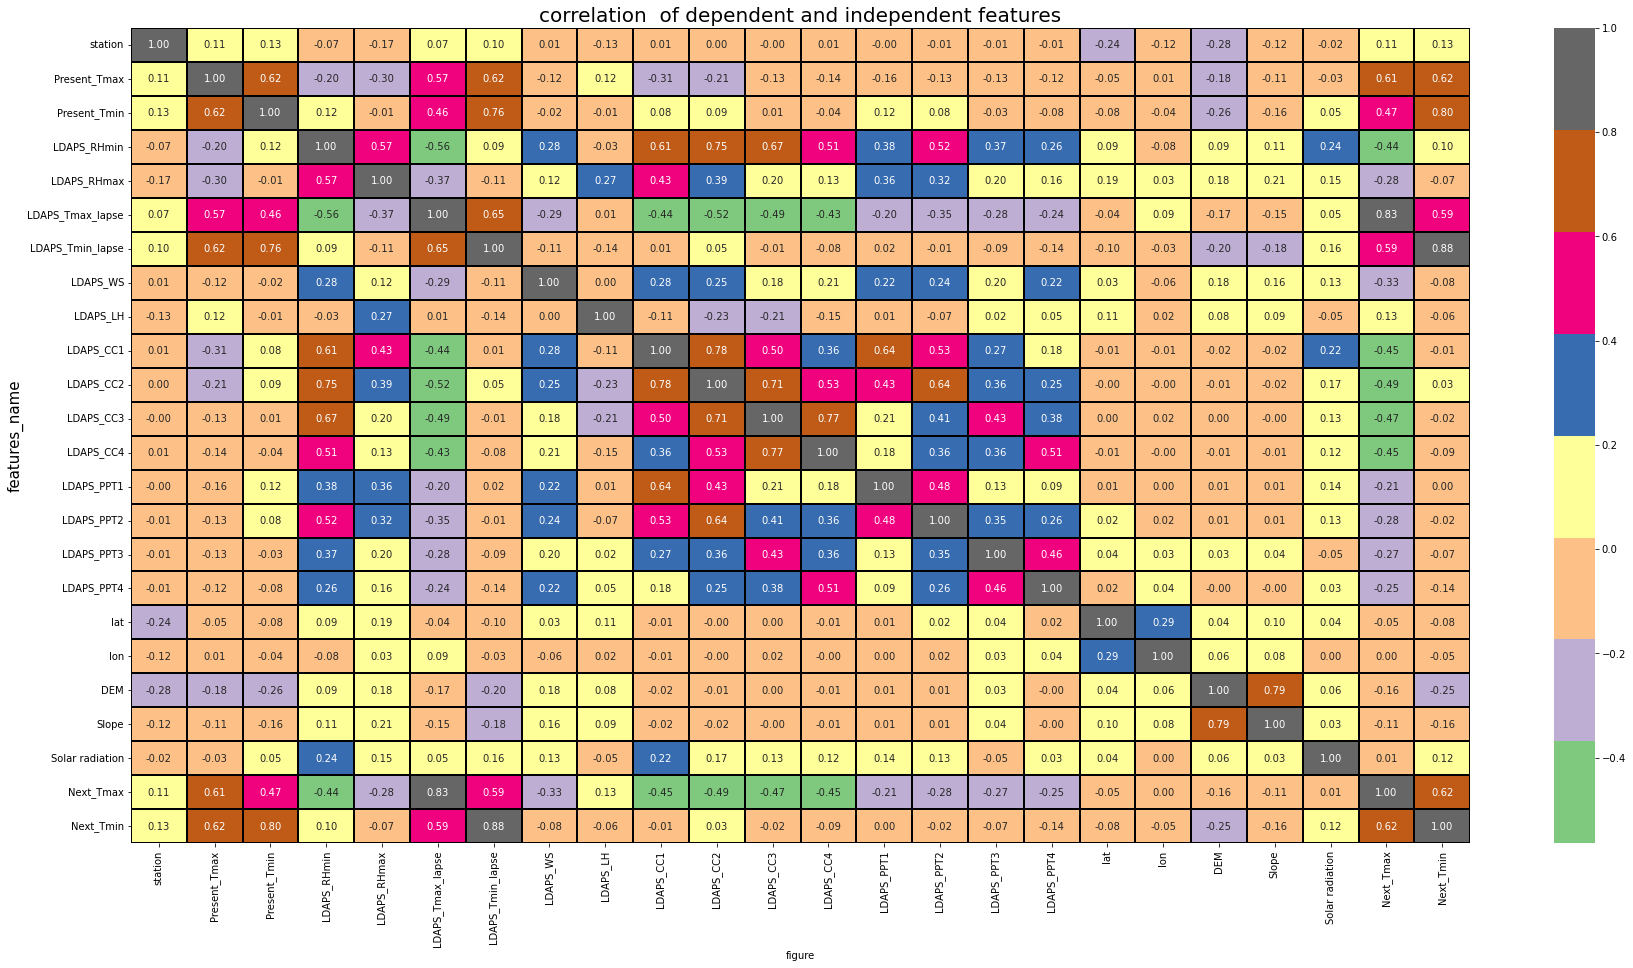

In [41]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Accent")
plt.xlabel('figure',fontsize=10)
plt.ylabel("features_name",fontsize=15)
plt.title("correlation  of dependent and independent features",fontsize=20)
plt.show()

In [13]:
df.corr()['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827189
Next_Tmin           0.621427
Present_Tmax        0.610348
LDAPS_Tmin_lapse    0.586983
Present_Tmin        0.471806
LDAPS_LH            0.157616
station             0.107983
Solar radiation     0.008795
lon                 0.003052
lat                -0.053510
Slope              -0.105518
DEM                -0.163183
LDAPS_PPT1         -0.211909
LDAPS_PPT4         -0.246416
LDAPS_PPT3         -0.267638
LDAPS_RHmax        -0.277857
LDAPS_PPT2         -0.281828
LDAPS_WS           -0.325913
LDAPS_RHmin        -0.437898
LDAPS_CC4          -0.446319
LDAPS_CC1          -0.452541
LDAPS_CC3          -0.467766
LDAPS_CC2          -0.490756
Name: Next_Tmax, dtype: float64

we can observe the positive correlated features and negative correlated features also.

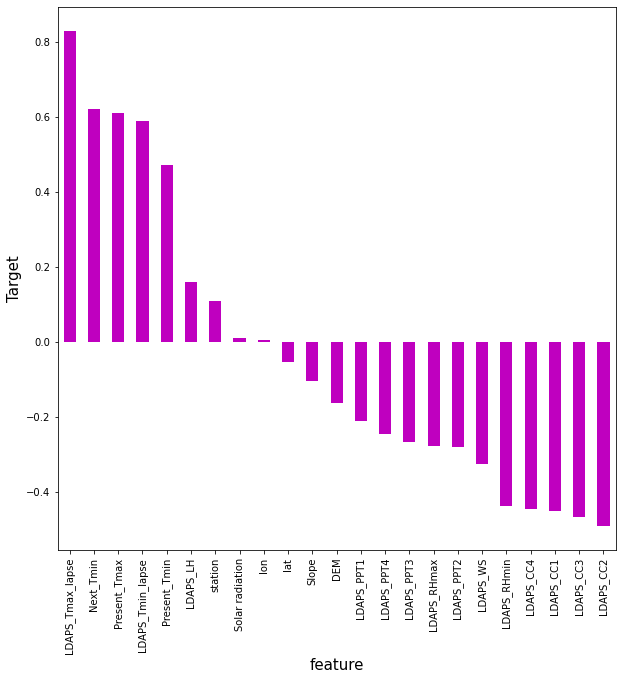

In [47]:
#visualizing the correlation between features and target
plt.figure(figsize=(10,10))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind="bar",color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.show()

In [16]:
#seperating Features and label
x=df[['station','Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2',
       'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmin']]
y=df["Next_Tmax"]

In [17]:
x.shape

(7752, 23)

In [18]:
y.shape

(7752,)

Feature Scaling using Robust Scaler:

In [19]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.000000,-0.285714,-0.62500,0.140169,0.149707,-0.397965,-0.241445,0.111099,0.261822,-0.203514,...,0.000000,0.000000,0.000000,0.000000,0.799703,-0.038095,3.284558,1.091478,0.763132,-0.59375
1,-0.916667,0.476190,-0.56250,-0.145286,0.095782,0.047213,0.099050,-0.395587,-0.115872,-0.223447,...,0.000000,0.000000,0.000000,0.000000,0.799703,0.352381,-0.029812,-0.085471,0.593677,-0.18750
2,-0.833333,0.404762,-0.03125,-0.315489,-0.617404,0.107504,0.274792,-0.189401,-0.792239,-0.261627,...,0.000000,0.000000,0.000000,0.000000,0.399110,0.600000,-0.416399,-0.334208,0.585783,0.25000
3,-0.750000,0.500000,0.00000,0.139412,0.706531,0.010614,-0.135713,-0.415323,0.181501,-0.245026,...,0.000000,0.000000,0.000000,0.000000,1.399110,0.257143,0.000000,0.996605,0.576746,0.37500
4,-0.666667,0.357143,-0.46875,0.041008,0.048270,-0.137403,-0.082621,-0.375325,1.092364,-0.398472,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,-0.354123,-0.092918,0.580294,-0.18750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,0.833333,-1.571429,-1.96875,-1.361081,-1.185717,-0.829471,-1.642826,-0.184555,0.318031,-0.685151,...,0.000000,0.000000,0.000000,0.000000,-0.200297,-0.990476,-1.183079,-0.484619,-1.361626,-1.56250
7748,0.916667,-1.571429,-1.78125,-1.489733,-1.364775,-0.664561,-1.656789,-0.008886,-0.217140,-0.671358,...,0.000000,0.000000,0.000000,0.000000,-0.400593,-0.819048,-1.094478,-0.389062,-1.368401,-1.34375
7749,1.000000,-1.595238,-1.87500,-1.542497,-1.370630,-0.431690,-1.726523,0.310068,-1.039868,-0.640464,...,0.000000,0.000000,0.000000,0.000000,-0.400593,-0.238095,-0.982351,-0.328005,-1.350614,-1.78125
7750,0.000000,-2.357143,-3.78125,-1.691998,-3.604669,-3.016322,-3.134217,-1.941158,-1.529244,-0.756091,...,0.000000,0.000000,0.000000,0.000000,-1.402077,-1.609524,-1.364337,-0.584037,-1.517658,-3.68750


Checking Variance Inflation Factor:

In [20]:
#Finding variance inflation factor in each scaled column.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif

,VIF values,features
0,1.231468,station
1,2.760545,Present_Tmax
2,3.452481,Present_Tmin
3,6.410637,LDAPS_RHmin
4,1.977474,LDAPS_RHmax
5,7.416896,LDAPS_Tmax_lapse
6,9.155396,LDAPS_Tmin_lapse
7,1.345258,LDAPS_WS
8,1.511407,LDAPS_LH
9,4.319864,LDAPS_CC1


By checking the vif values , we can observe that the multi collinearity problem is not present.

We can now move ahead for model building.

Modelling:

In [21]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [22]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)

In [23]:
from sklearn import metrics

In [24]:
def r2_score(name,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=name.predict(x_train)
        print("r2_score on training data",metrics.r2_score(y_train,y_pred)*100)
        
    else:
         if train==False:
            y_test_pred=name.predict(x_test)
            print("r2_score:",metrics.r2_score(y_test,y_test_pred))
            print("Mean absolute error:-",mean_absolute_error(y_test,y_test_pred))
            print("mean squared error:-",mean_squared_error(y_test,y_test_pred))
            print("Root mean squared error:-",np.sqrt(mean_squared_error(y_test,y_test_pred)))  

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [26]:
#Model initiation for LinearRegression
name=LinearRegression()
name.fit(x_train,y_train)

LinearRegression()

In [27]:
r2_score(name,x_train,x_test,y_train,y_test,train=True)
r2_score(name,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 78.44045157162486
r2_score: 0.8096586607108041
Mean absolute error:- 1.0457495630612825
mean squared error:- 1.8484736433397893
Root mean squared error:- 1.359585835223282


In [29]:
#finding the random state
maxAccuracy=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    name=LinearRegression()
    name.fit(x_train,y_train)
    y_test_pred=name.predict(x_test)
    acc=metrics.r2_score(y_test,y_test_pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRs=i
print("maximum r2_score is ",maxAccuracy,"on Random state",maxRs)        

maximum r2_score is  0.8076387298305394 on Random state 124


The r2 score using linear regression is 80.96%

In [30]:
#finding cv score
from sklearn.model_selection import cross_val_score
score=cross_val_score(name,X,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score.mean())*100)

[0.6950254  0.67712671 0.71957587 0.82555109 0.72441764]
0.728339342115089
Difference between R2 score and cross validation score is : 6.915128130117765


In [31]:
#Model initiation for RandomForestRegressor
name1= RandomForestRegressor()
name1.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
r2_score(name1,x_train,x_test,y_train,y_test,train=True)
r2_score(name1,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 98.59339489313778
r2_score: 0.9037483213636532
Mean absolute error:- 0.721902942674202
mean squared error:- 0.9310101402004768
Root mean squared error:- 0.9648886672567343


r2 score using RandomForestRegressor is 90.37%

In [33]:
#finding cv score
from sklearn.model_selection import cross_val_score
score1=cross_val_score(name1,X,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score1.mean())*100)

[0.69183575 0.66459138 0.64955021 0.81660587 0.672006  ]
0.6989178404514169
Difference between R2 score and cross validation score is : 9.857278296484973


In [34]:
#Model initiation for KNN
name2=KNN()
name2.fit(x_train,y_train)

KNeighborsRegressor()

In [35]:
r2_score(name2,x_train,x_test,y_train,y_test,train=True)
r2_score(name2,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 87.03951856439068
r2_score: 0.8033209172051512
Mean absolute error:- 1.0267111504395228
mean squared error:- 1.9024106700429737
Root mean squared error:- 1.3792790399491228


r2 score using KNN is 80.33%

In [36]:
#finding cv score
from sklearn.model_selection import cross_val_score
score2=cross_val_score(name2,X,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score2.mean())*100)

[0.44995488 0.2521342  0.4417793  0.64615194 0.45800892]
0.4496058497176597
Difference between R2 score and cross validation score is : 34.78847736986069


In [37]:
#Model initiation for GradientBoostingRegressor
name3=GradientBoostingRegressor()
name3.fit(x_train,y_train)

GradientBoostingRegressor()

In [38]:
r2_score(name3,x_train,x_test,y_train,y_test,train=True)
r2_score(name3,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 87.78325924060037
r2_score: 0.8602550454705886
Mean absolute error:- 0.8943154036930352
mean squared error:- 1.3517059811526904
Root mean squared error:- 1.1626289094774354


The r2 score using GradientBoostingRegressor is 86.02%

In [39]:
#finding cv score
from sklearn.model_selection import cross_val_score
score3=cross_val_score(name3,X,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score3.mean())*100)

[0.70860021 0.68630876 0.67650184 0.82946185 0.69542291]
0.719259114495836
Difference between R2 score and cross validation score is : 7.823150892043063


In [40]:
#Model initiation for lasso
name4=Lasso()
name4.fit(x_train,y_train)

Lasso()

In [41]:
r2_score(name4,x_train,x_test,y_train,y_test,train=True)
r2_score(name4,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 48.334428984751675
r2_score: 0.492724867677788
Mean absolute error:- 1.785016507348109
mean squared error:- 4.90670187527696
Root mean squared error:- 2.215107644173745


The r2 score using Lasso is 49%

In [42]:
#finding cv score
from sklearn.model_selection import cross_val_score
score4=cross_val_score(name4,X,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score4.mean())*100)

[0.42131565 0.39155759 0.48723253 0.34788594 0.46228045]
0.42205443131613685
Difference between R2 score and cross validation score is : 37.54361921001298


In [43]:
#Model initiation for Ridge
name5=Ridge()
name5.fit(x_train,y_train)

Ridge()

In [44]:
r2_score(name5,x_train,x_test,y_train,y_test,train=True)
r2_score(name5,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 78.97334821168823
r2_score: 0.797504374401186
Mean absolute error:- 1.0659503201916551
mean squared error:- 1.9586721338233741
Root mean squared error:- 1.3995256817305548


The r2 score using Ridge is 79.75%

In [45]:
#finding cv score
from sklearn.model_selection import cross_val_score
score5=cross_val_score(name5,X,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score5.mean())*100)

[0.69523476 0.67707915 0.71951918 0.82563398 0.72445644]
0.7283847013996021
Difference between R2 score and cross validation score is : 6.9105922016664545


In [46]:
#Model initiation for DecisionTreeRegressor
name6=DecisionTreeRegressor()
name6.fit(x_train,y_train)

DecisionTreeRegressor()

In [47]:
r2_score(name6,x_train,x_test,y_train,y_test,train=True)
r2_score(name6,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 100.0
r2_score: 0.7847035766086475
Mean absolute error:- 1.0463346662325703
mean squared error:- 2.082489948913499
Root mean squared error:- 1.4430834864669124


The r2 score using DecisionTreeRegressor is 78%

In [48]:
#finding cv score
from sklearn.model_selection import cross_val_score
score6=cross_val_score(name6,X,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score6.mean())*100)

[0.34564363 0.42536618 0.32503152 0.66715735 0.45569098]
0.4437779332648527
Difference between R2 score and cross validation score is : 35.371269015141394


In [49]:
from sklearn.ensemble import ExtraTreesRegressor
#Model initiation for ExtraTreesRegressor
name7=ExtraTreesRegressor()
name7.fit(x_train,y_train)

ExtraTreesRegressor()

In [50]:
r2_score(name7,x_train,x_test,y_train,y_test,train=True)
r2_score(name7,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 100.0
r2_score: 0.9219533347498845
Mean absolute error:- 0.6521374644861653
mean squared error:- 0.7549191638643364
Root mean squared error:- 0.8688608426349621


 The r2_score using ExtraTreesRegressor is 92.19%

In [51]:
#finding cv score
from sklearn.model_selection import cross_val_score
score7=cross_val_score(name7,X,y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score7.mean())*100)

[0.69980998 0.65185232 0.67842746 0.81996752 0.69168126]
0.7083477074395935
Difference between R2 score and cross validation score is : 8.914291597667312


In [52]:
from sklearn.svm import SVR
#Model initiation for SVR
name8=SVR()
name8.fit(x_train,y_train)

SVR()

In [53]:
r2_score(name8,x_train,x_test,y_train,y_test,train=True)
r2_score(name8,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 77.65151330592668
r2_score: 0.7748963996823508
Mean absolute error:- 1.1077695602280775
mean squared error:- 2.17735147542899
Root mean squared error:- 1.4755851298481528


The r2 score using SVR is 77.48%

In [54]:
#finding cv score
from sklearn.model_selection import cross_val_score
score8=cross_val_score(name8,X,y)
print(score8)
print(score8.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score8.mean())*100)

[0.71081535 0.5508875  0.64814508 0.74220963 0.68308689]
0.6670288918906161
Difference between R2 score and cross validation score is : 13.046173152565055


from the difference of both r2_score and cross validation score computed on r2 score we can conclude that ExtraTreesRegressor as our best fitting model.

Hyper Parameter Tuning:

In [55]:
from sklearn.model_selection import GridSearchCV

In [59]:
param={'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
      'random_state':[10,50,100],
       'max_depth':[10,20],
       'n_jobs':[-2,-1,1],
      'n_estimators':[50,100]}

In [60]:
GSV=GridSearchCV(ExtraTreesRegressor(),param,cv=5)

In [61]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [10, 20], 'n_estimators': [50, 100],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [62]:
GSV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 100}

In [63]:
Model=ExtraTreesRegressor(criterion='friedman_mse',max_depth=20,n_estimators=100,n_jobs=-2,random_state=100)

In [64]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)

In [70]:
y_pred=name7.predict(x_train)
print("r2_score on training data",metrics.r2_score(y_train,y_pred)*100)

r2_score on training data 100.0


In [71]:
print("R2_score:",metrics.r2_score(y_test,pred))
print("Mean Absolute error:",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.922496226008204
Mean Absolute error: 0.6514258355358684
mean squared error: 0.7496679591717794
Root mean squared error: 0.8658336787003491


The r2_score using ExtraTreesRegressor Hyper parameter Tuning is 92.24%

In [72]:
#to save the model
import pickle
file_name="Temperature_project.pkl"
pickle.dump(Model,open(file_name,'wb'))

In [73]:
import pickle
loaded_model=pickle.load(open('Temperature_project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

92.2496226008204


The r2_score using loaded model is 92.24%

In [74]:
PR_OR_df=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
PR_OR_df

,0,1,2,3,4,5,6,7,8,9,...,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325
predicted,31.814655,24.298,31.296865,30.398,20.993,29.415538,29.736122,32.525632,28.848914,24.279,...,33.264981,22.922316,28.580552,28.175696,31.9718,27.670417,31.058143,28.129429,27.749487,32.48498
original,32.200000,24.200,34.200000,29.300,21.000,29.100000,29.800000,31.700000,27.200000,24.200,...,32.700000,23.900000,28.400000,28.700000,31.9000,27.100000,31.200000,29.200000,27.600000,31.40000


Predicted is the maximum temperature for the Next day . 

For Finding Minimum temperature of the next day:

Data visualization:

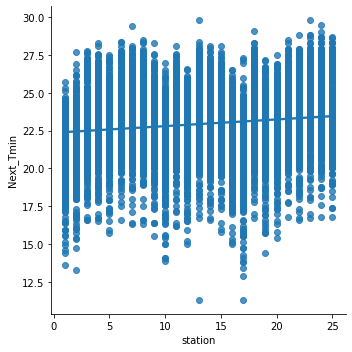

In [15]:
sns.lmplot(x="station",y="Next_Tmin",data=df,palette="icefire")

station has not a  high positive relation with Next_Tmin

In [16]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

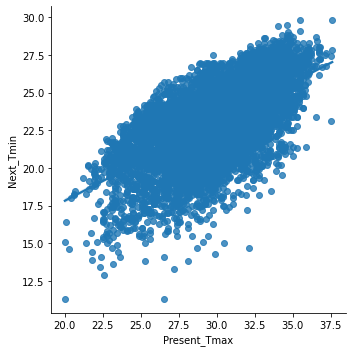

In [17]:
sns.lmplot(x="Present_Tmax",y="Next_Tmin",data=df,palette="icefire")

Present_Tmax has positive relation with Next_Tmin

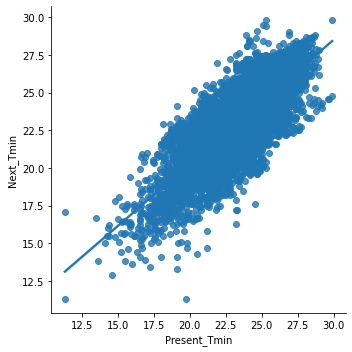

In [18]:
sns.lmplot(x="Present_Tmin",y="Next_Tmin",data=df,palette="icefire")

Present_Tmin has a high positive relation with Next_Tmin

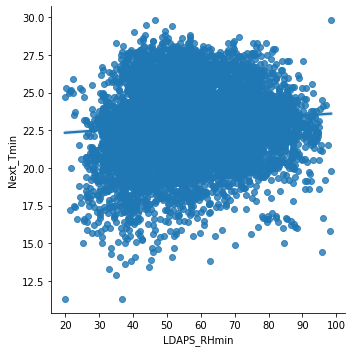

In [19]:
sns.lmplot(x="LDAPS_RHmin",y="Next_Tmin",data=df,palette="icefire")

LDAPS_RHmin has not a high positive relation with Next_Tmin

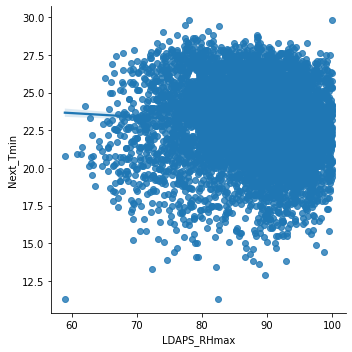

In [20]:
sns.lmplot(x="LDAPS_RHmax",y="Next_Tmin",data=df,palette="icefire")

LDAPS_RHmax has a negative relation with Next_Tmax.

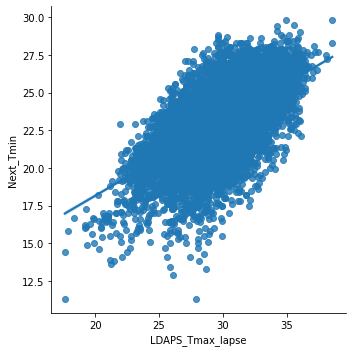

In [21]:
sns.lmplot(x="LDAPS_Tmax_lapse",y="Next_Tmin",data=df,palette="icefire")

LDAPS_Tmax_lapse has a positive relation with Next_Tmin

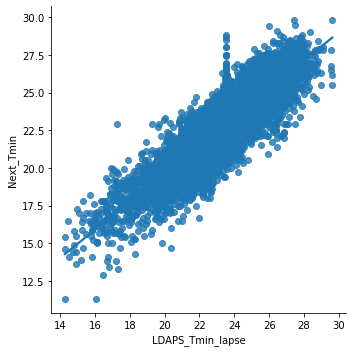

In [22]:
sns.lmplot(x="LDAPS_Tmin_lapse",y="Next_Tmin",data=df,palette="icefire")

LDAPS_Tmin_lapse has a high positive relation with Next_Tmin

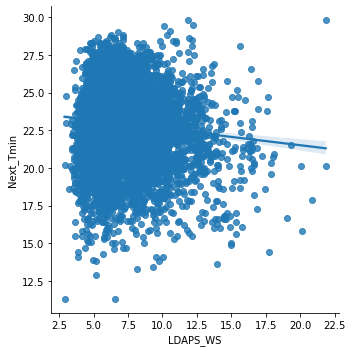

In [23]:
sns.lmplot(x="LDAPS_WS",y="Next_Tmin",data=df,palette="icefire")

LDAPS_WS has a negative relation with Next_Tmin

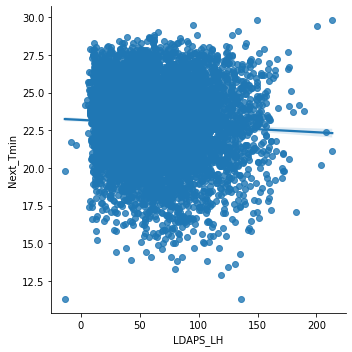

In [24]:
sns.lmplot(x="LDAPS_LH",y="Next_Tmin",data=df,palette="icefire")

LDAPS_LH has a negative relation with Next_Tmin.

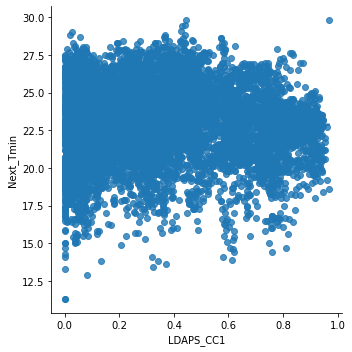

In [25]:
sns.lmplot(x="LDAPS_CC1",y="Next_Tmin",data=df,palette="icefire")

LDAPS_CC1 has not having a proper relation with Next_Tmin.

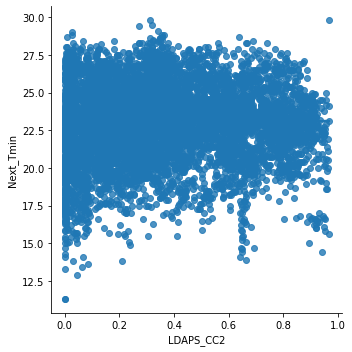

In [26]:
sns.lmplot(x="LDAPS_CC2",y="Next_Tmin",data=df,palette="icefire")

LDAPS_CC2 has not having a proper relation with Next_Tmin.

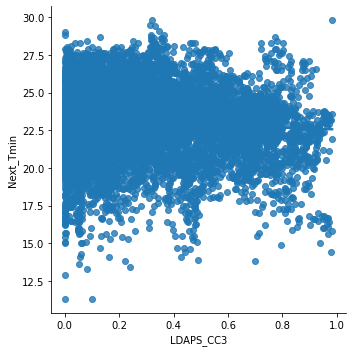

In [27]:
sns.lmplot(x="LDAPS_CC3",y="Next_Tmin",data=df,palette="icefire")

LDAPS_CC3 is following a constant relation with Next_Tmin.

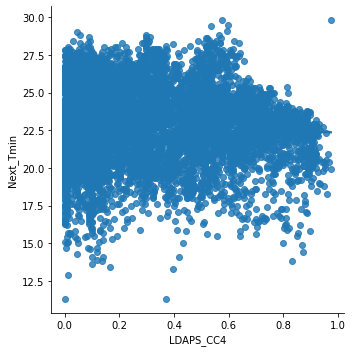

In [28]:
sns.lmplot(x="LDAPS_CC4",y="Next_Tmin",data=df,palette="icefire")

LDAPS_CC4 has not having a proper relation with Next_Tmin.

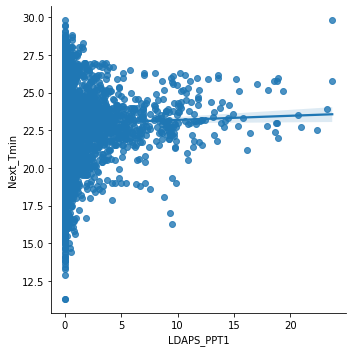

In [29]:
sns.lmplot(x="LDAPS_PPT1",y="Next_Tmin",data=df,palette="icefire")

LDAPS_PPT1 is not having a high positive relation with Next_Tmin.

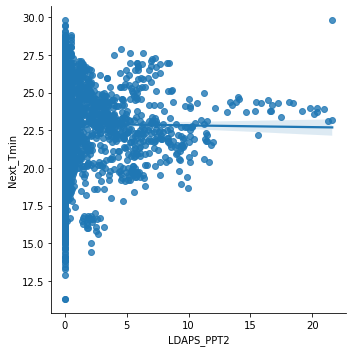

In [30]:
sns.lmplot(x="LDAPS_PPT2",y="Next_Tmin",data=df,palette="icefire")

LDAPS_PPT2 is not having a high positive relation with Next_Tmin.

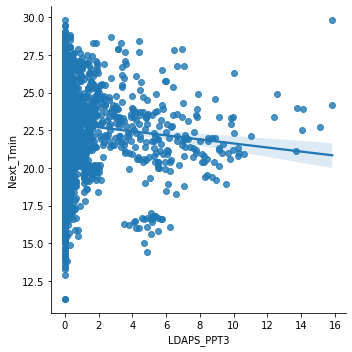

In [31]:
sns.lmplot(x="LDAPS_PPT3",y="Next_Tmin",data=df,palette="icefire")

LDAPS_PPT3 is  having a negative relation with Next_Tmin.

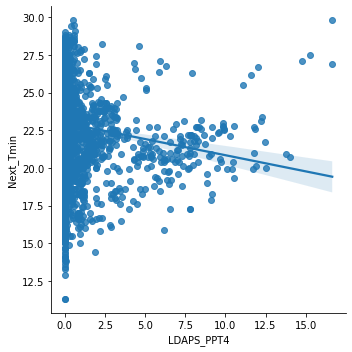

In [32]:
sns.lmplot(x="LDAPS_PPT4",y="Next_Tmin",data=df,palette="icefire")

LDAPS_PPT4 is having a negative relation with Next_Tmin.

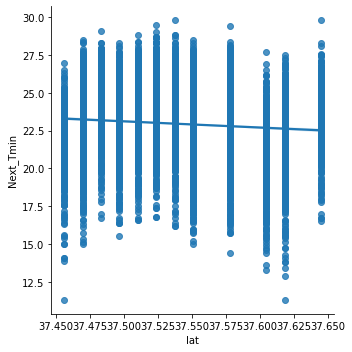

In [33]:
sns.lmplot(x="lat",y="Next_Tmin",data=df,palette="icefire")

lat  is having a negative relation with Next_Tmin.

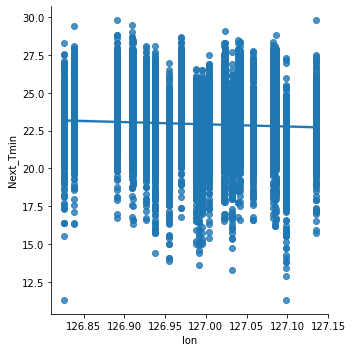

In [35]:
sns.lmplot(x="lon",y="Next_Tmin",data=df,palette="icefire")

lon is having a constant relation with Next_Tmin.

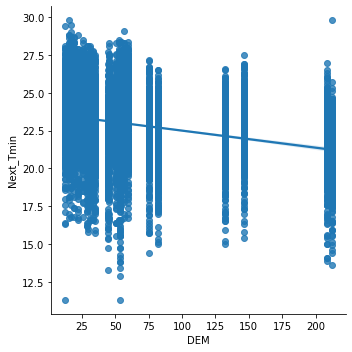

In [36]:
sns.lmplot(x="DEM",y="Next_Tmin",data=df,palette="icefire")

DEM is having a negative relation with Next_Tmin

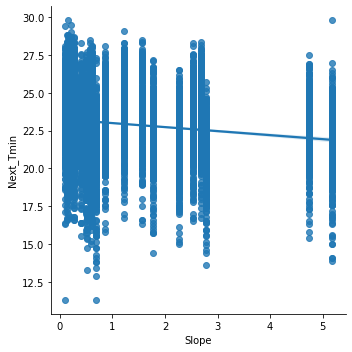

In [37]:
sns.lmplot(x="Slope",y="Next_Tmin",data=df,palette="icefire")

Slope is having a negative relation with Next_Tmin

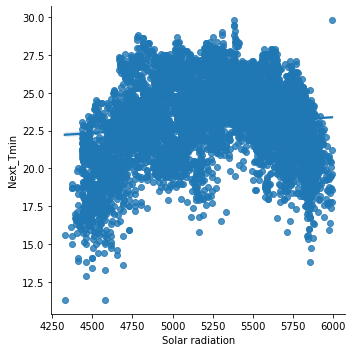

In [38]:
sns.lmplot(x="Solar radiation",y="Next_Tmin",data=df,palette="icefire")

Solar radiation is not having a high positive relation with Next_Tmin

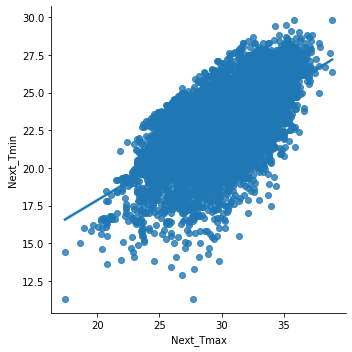

In [39]:
sns.lmplot(x="Next_Tmax",y="Next_Tmin",data=df,palette="icefire")

Next_Tmax is  having a  positive relation with Next_Tmin

In [40]:
#Let's check the skewness
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_PPT1,LPAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope columns have skewness.Let us remove skewness using sqrt method.



In [41]:
df["LDAPS_RHmax"]=np.sqrt(df["LDAPS_RHmax"])
df["LDAPS_WS"]=np.sqrt(df["LDAPS_WS"])
df["LDAPS_CC3"]=np.sqrt(df["LDAPS_CC3"])
df["LDAPS_PPT1"]=np.sqrt(df["LDAPS_PPT1"])
df["LDAPS_PPT2"]=np.sqrt(df["LDAPS_PPT2"])
df["LDAPS_PPT3"]=np.sqrt(df["LDAPS_PPT3"])
df["LDAPS_PPT4"]=np.sqrt(df["LDAPS_PPT4"])
df["DEM"]=np.sqrt(df["DEM"])
df["Slope"]=np.sqrt(df["Slope"])


In [42]:
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.965013
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.046360
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3          -0.118909
LDAPS_CC4           0.666482
LDAPS_PPT1          2.726243
LDAPS_PPT2          3.090875
LDAPS_PPT3          3.625925
LDAPS_PPT4          3.904452
lat                 0.087062
lon                -0.285213
DEM                 1.152438
Slope               0.871432
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

still some skewness is present in LDAPS_WS,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,Slope columns.


In [43]:
#correlation between Dependent variables and independent variable
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.112655,0.131646,-0.066733,-0.165810,0.069107,0.104758,0.008370,-0.133357,0.006919,...,-0.009749,-0.013601,-0.007099,-0.237502,-0.118704,-0.277891,-0.118124,-0.019001,0.107983,0.128293
Present_Tmax,0.112655,1.000000,0.618760,-0.204571,-0.297071,0.570129,0.623496,-0.118134,0.135463,-0.311805,...,-0.129442,-0.127673,-0.117691,-0.052615,0.009020,-0.177451,-0.109633,-0.025439,0.610348,0.622741
Present_Tmin,0.131646,0.618760,1.000000,0.123143,-0.012050,0.464151,0.762993,-0.024316,-0.009258,0.084447,...,0.084215,-0.027870,-0.080338,-0.078475,-0.043461,-0.256021,-0.160619,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066733,-0.204571,0.123143,1.000000,0.574629,-0.564580,0.089476,0.282790,-0.070858,0.613818,...,0.523863,0.370217,0.257986,0.087099,-0.076237,0.094451,0.110101,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.165810,-0.297071,-0.012050,0.574629,1.000000,-0.368110,-0.109817,0.120958,0.239888,0.431865,...,0.316505,0.202661,0.159815,0.190843,0.026882,0.177887,0.207082,0.145661,-0.277857,-0.068405
LDAPS_Tmax_lapse,0.069107,0.570129,0.464151,-0.564580,-0.368110,1.000000,0.654021,-0.292864,0.048010,-0.438439,...,-0.348270,-0.280311,-0.242099,-0.042093,0.090666,-0.168104,-0.146806,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,0.623496,0.762993,0.089476,-0.109817,0.654021,1.000000,-0.113285,-0.134761,0.010901,...,-0.008258,-0.094771,-0.137144,-0.096257,-0.026701,-0.198431,-0.183595,0.159975,0.586983,0.880176
LDAPS_WS,0.008370,-0.118134,-0.024316,0.282790,0.120958,-0.292864,-0.113285,1.000000,-0.003890,0.282185,...,0.239000,0.198964,0.224949,0.027422,-0.062586,0.178812,0.155216,0.132219,-0.325913,-0.079439
LDAPS_LH,-0.133357,0.135463,-0.009258,-0.070858,0.239888,0.048010,-0.134761,-0.003890,1.000000,-0.147296,...,-0.103719,-0.002059,0.024579,0.133221,0.025822,0.046479,0.060114,-0.047384,0.157616,-0.055440
LDAPS_CC1,0.006919,-0.311805,0.084447,0.613818,0.431865,-0.438439,0.010901,0.282185,-0.147296,1.000000,...,0.533159,0.267849,0.184828,-0.008131,-0.006843,-0.015094,-0.020535,0.218309,-0.452541,-0.011028


This gives the correlation between dependent and independent features.


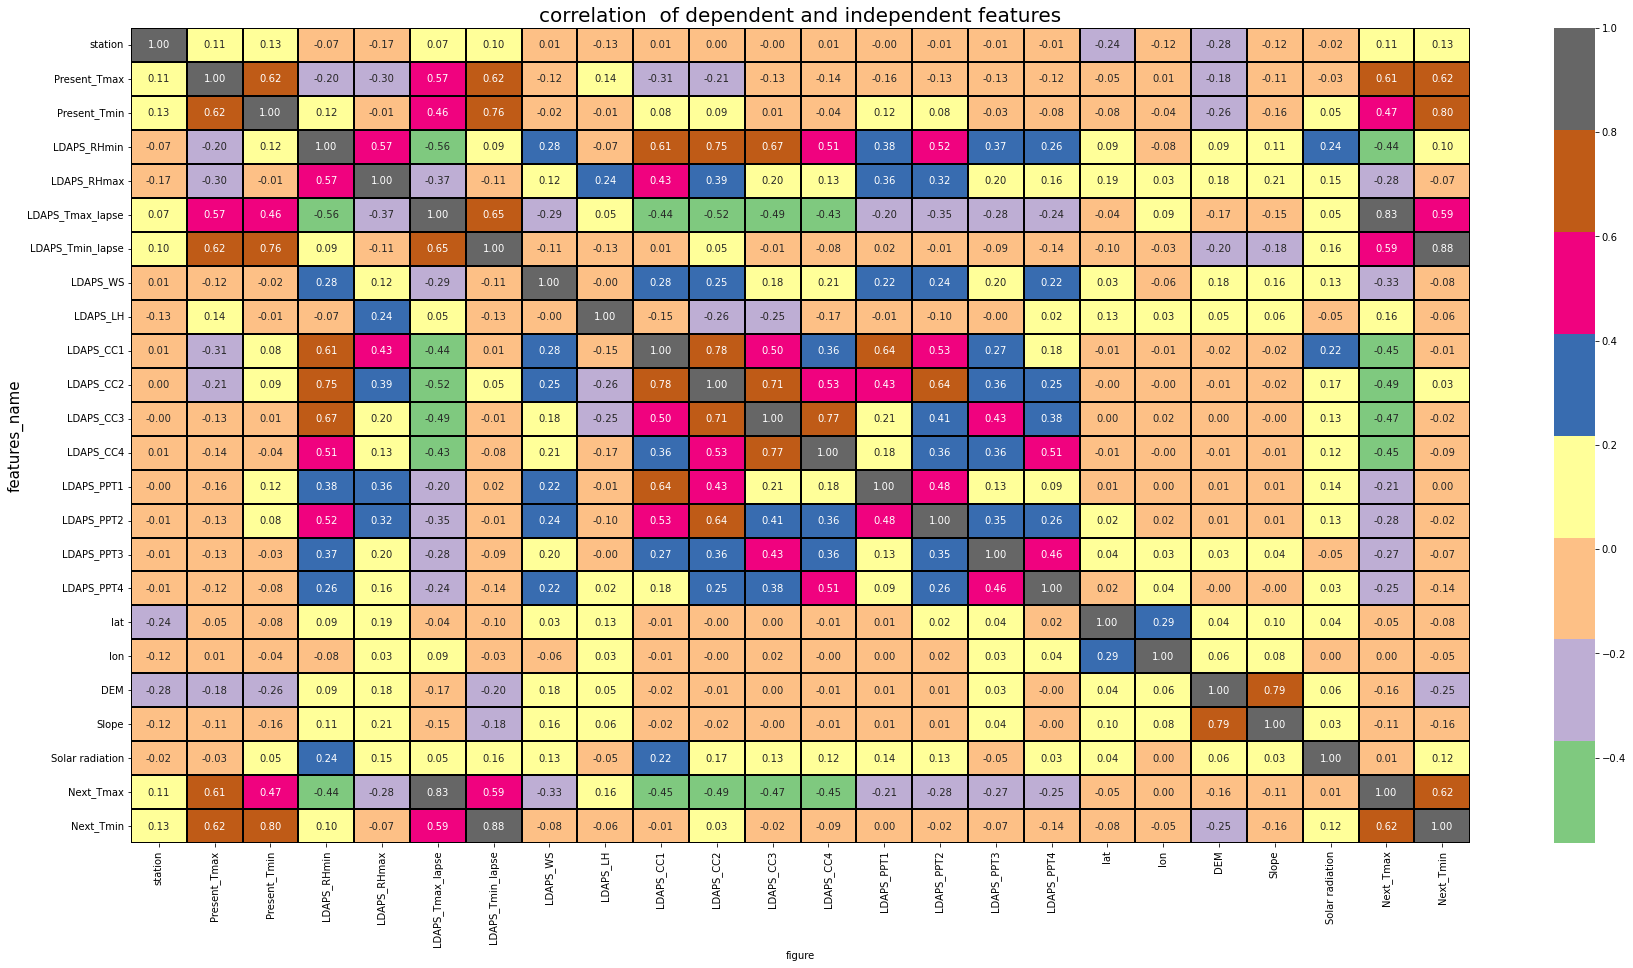

In [44]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Accent")
plt.xlabel('figure',fontsize=10)
plt.ylabel("features_name",fontsize=15)
plt.title("correlation  of dependent and independent features",fontsize=20)
plt.show()

In [45]:
df.corr()['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.880176
Present_Tmin        0.796670
Present_Tmax        0.622741
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.586868
station             0.128293
Solar radiation     0.120212
LDAPS_RHmin         0.095019
LDAPS_CC2           0.031250
LDAPS_PPT1          0.003717
LDAPS_CC1          -0.011028
LDAPS_CC3          -0.016060
LDAPS_PPT2         -0.016626
lon                -0.046603
LDAPS_LH           -0.055440
LDAPS_RHmax        -0.068405
LDAPS_PPT3         -0.069182
LDAPS_WS           -0.079439
lat                -0.083533
LDAPS_CC4          -0.085093
LDAPS_PPT4         -0.139016
Slope              -0.161570
DEM                -0.253425
Name: Next_Tmin, dtype: float64

we can observe both the positive and negative correlated features with the target.

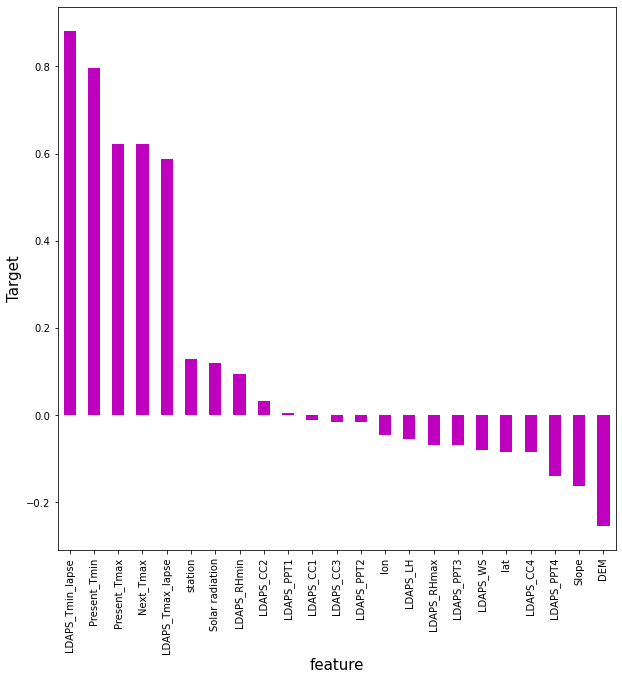

In [48]:
#visualizing the correlation between features and target
plt.figure(figsize=(10,10))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind="bar",color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.show()

In [49]:
#seperating Features and label
x=df[['station','Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2',
       'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax']]
y=df["Next_Tmin"]

In [50]:
x.shape

(7752, 23)

In [51]:
y.shape

(7752,)

Feature scaling using Robust Scaler:

In [52]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-1.000000,-0.285714,-0.62500,0.140169,0.149707,-0.397965,-0.241445,0.111099,0.261822,-0.203514,...,0.000000,0.000000,0.000000,0.000000,0.799703,-0.038095,3.284558,1.091478,0.763132,-0.318182
1,-0.916667,0.476190,-0.56250,-0.145286,0.095782,0.047213,0.099050,-0.395587,-0.115872,-0.223447,...,0.000000,0.000000,0.000000,0.000000,0.799703,0.352381,-0.029812,-0.085471,0.593677,0.000000
2,-0.833333,0.404762,-0.03125,-0.315489,-0.617404,0.107504,0.274792,-0.189401,-0.792239,-0.261627,...,0.000000,0.000000,0.000000,0.000000,0.399110,0.600000,-0.416399,-0.334208,0.585783,0.136364
3,-0.750000,0.500000,0.00000,0.139412,0.706531,0.010614,-0.135713,-0.415323,0.181501,-0.245026,...,0.000000,0.000000,0.000000,0.000000,1.399110,0.257143,0.000000,0.996605,0.576746,0.272727
4,-0.666667,0.357143,-0.46875,0.041008,0.048270,-0.137403,-0.082621,-0.375325,1.092364,-0.398472,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,-0.354123,-0.092918,0.580294,0.159091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,0.833333,-1.571429,-1.96875,-1.361081,-1.185717,-0.829471,-1.642826,-0.184555,0.318031,-0.685151,...,0.000000,0.000000,0.000000,0.000000,-0.200297,-0.990476,-1.183079,-0.484619,-1.361626,-0.500000
7748,0.916667,-1.571429,-1.78125,-1.489733,-1.364775,-0.664561,-1.656789,-0.008886,-0.217140,-0.671358,...,0.000000,0.000000,0.000000,0.000000,-0.400593,-0.819048,-1.094478,-0.389062,-1.368401,-0.431818
7749,1.000000,-1.595238,-1.87500,-1.542497,-1.370630,-0.431690,-1.726523,0.310068,-1.039868,-0.640464,...,0.000000,0.000000,0.000000,0.000000,-0.400593,-0.238095,-0.982351,-0.328005,-1.350614,-0.613636
7750,0.000000,-2.357143,-3.78125,-1.691998,-3.604669,-3.016322,-3.134217,-1.941158,-1.529244,-0.756091,...,0.000000,0.000000,0.000000,0.000000,-1.402077,-1.609524,-1.364337,-0.584037,-1.517658,-2.977273


Checking Variance Inflation Factor:

In [53]:
#Finding variance inflation factor in each scaled column.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif

,VIF values,features
0,1.241685,station
1,2.840985,Present_Tmax
2,3.093966,Present_Tmin
3,6.375374,LDAPS_RHmin
4,1.976599,LDAPS_RHmax
5,8.809306,LDAPS_Tmax_lapse
6,7.352116,LDAPS_Tmin_lapse
7,1.385941,LDAPS_WS
8,1.532750,LDAPS_LH
9,4.355698,LDAPS_CC1


By checking the vif values , we can observe that the multi collinearity problem is not present.

We can now move ahead for model building.

Modelling:

In [54]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [55]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=200)

In [56]:
from sklearn import metrics

In [57]:
def r2_score(name,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=name.predict(x_train)
        print("r2_score on training data",metrics.r2_score(y_train,y_pred)*100)
        
    else:
         if train==False:
            y_test_pred=name.predict(x_test)
            print("r2_score:",metrics.r2_score(y_test,y_test_pred))
            print("Mean absolute error:-",mean_absolute_error(y_test,y_test_pred))
            print("mean squared error:-",mean_squared_error(y_test,y_test_pred))
            print("Root mean squared error:-",np.sqrt(mean_squared_error(y_test,y_test_pred)))  

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [59]:
#Model initiation for LinearRegression
name=LinearRegression()
name.fit(x_train,y_train)

LinearRegression()

In [60]:
r2_score(name,x_train,x_test,y_train,y_test,train=True)
r2_score(name,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 84.94673661326316
r2_score: 0.8467210805979939
Mean absolute error:- 0.7432065580685926
mean squared error:- 0.88059688968123
Root mean squared error:- 0.9384012413041822


The r2 score using linear regression is 84.67%

In [61]:
#finding the random state
maxAccuracy=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    name=LinearRegression()
    name.fit(x_train,y_train)
    y_test_pred=name.predict(x_test)
    acc=metrics.r2_score(y_test,y_test_pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRs=i
print("maximum r2_score is ",maxAccuracy,"on Random state",maxRs)        

maximum r2_score is  0.8612417922785519 on Random state 84


In [62]:
#finding cv score
from sklearn.model_selection import cross_val_score
score=cross_val_score(name,X,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score.mean())*100)

[0.71523798 0.67620939 0.8158692  0.88524857 0.87707533]
0.7939280931904612
Difference between R2 score and cross validation score is : 5.752182554581742


In [63]:
#Model initiation for RandomForestRegressor
name1= RandomForestRegressor()
name1.fit(x_train,y_train)

RandomForestRegressor()

In [64]:
r2_score(name1,x_train,x_test,y_train,y_test,train=True)
r2_score(name1,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 98.6737987000891
r2_score: 0.909849706782892
Mean absolute error:- 0.5630288014202747
mean squared error:- 0.5438494776427109
Root mean squared error:- 0.7374615092618129


The r2 score using RandomForestRegressor is 90.98%=91%

In [65]:
#finding cv score
from sklearn.model_selection import cross_val_score
score1=cross_val_score(name1,X,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score1.mean())*100)

[0.69848578 0.67616205 0.81918375 0.8729183  0.87671155]
0.7886922869647237
Difference between R2 score and cross validation score is : 6.275763177155492


In [66]:
#Model initiation for KNN
name2=KNN()
name2.fit(x_train,y_train)

KNeighborsRegressor()

In [67]:
r2_score(name2,x_train,x_test,y_train,y_test,train=True)
r2_score(name2,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 87.83256355683216
r2_score: 0.8052376878647679
Mean absolute error:- 0.7876806139684501
mean squared error:- 1.1749421764402161
Root mean squared error:- 1.0839474970865592


The r2 score using KNN is 80.52%=81%

In [68]:
#finding cv score
from sklearn.model_selection import cross_val_score
score2=cross_val_score(name2,X,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score2.mean())*100)

[0.18046435 0.20856318 0.61886409 0.5348456  0.63797386]
0.43614221532042097
Difference between R2 score and cross validation score is : 41.530770341585765


In [69]:
#Model initiation for GradientBoostingRegressor
name3=GradientBoostingRegressor()
name3.fit(x_train,y_train)

GradientBoostingRegressor()

In [70]:
r2_score(name3,x_train,x_test,y_train,y_test,train=True)
r2_score(name3,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 90.93285572387491
r2_score: 0.8924677976325197
Mean absolute error:- 0.6317459304907161
mean squared error:- 0.6487092831354907
Root mean squared error:- 0.8054249084399431


The r2 score using GradientBoostingRegressor is 89.24%=89%

In [71]:
#finding cv score
from sklearn.model_selection import cross_val_score
score3=cross_val_score(name3,X,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score3.mean())*100)

[0.70044752 0.68597929 0.84184586 0.87636676 0.89519457]
0.7999667982357052
Difference between R2 score and cross validation score is : 5.1483120500573465


In [73]:
#Model initiation for Lasso
name4=Lasso()
name4.fit(x_train,y_train)

Lasso()

In [74]:
r2_score(name4,x_train,x_test,y_train,y_test,train=True)
r2_score(name4,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 49.85273196670544
r2_score: 0.5097105660835834
Mean absolute error:- 1.3599076609039027
mean squared error:- 2.9577680006766958
Root mean squared error:- 1.719816269453425


r2 score using lasso is 50.97%=51%

In [75]:
#finding cv score
from sklearn.model_selection import cross_val_score
score4=cross_val_score(name4,X,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score4.mean())*100)

[0.42648264 0.27431588 0.44650421 0.36505645 0.52199398]
0.4068706319035405
Difference between R2 score and cross validation score is : 44.45792868327381


In [77]:
#Model initiation for Ridge
name5=Ridge()
name5.fit(x_train,y_train)

Ridge()

In [78]:
r2_score(name5,x_train,x_test,y_train,y_test,train=True)
r2_score(name5,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 84.7696093392661
r2_score: 0.8514493899667599
Mean absolute error:- 0.7495473854441224
mean squared error:- 0.8961609417677646
Root mean squared error:- 0.946657774366093


r2 score using Ridge is 85.14%=85%

In [79]:
#finding cv score
from sklearn.model_selection import cross_val_score
score5=cross_val_score(name5,X,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score5.mean())*100)

[0.71533136 0.67633959 0.81582819 0.88525109 0.87709008]
0.7939680593205626
Difference between R2 score and cross validation score is : 5.748185941571604


In [80]:
#Model initiation for DecisionTreeRegressor
name6=DecisionTreeRegressor()
name6.fit(x_train,y_train)

DecisionTreeRegressor()

In [81]:
r2_score(name6,x_train,x_test,y_train,y_test,train=True)
r2_score(name6,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 100.0
r2_score: 0.7881610718411945
Mean absolute error:- 0.8350401288933041
mean squared error:- 1.2779602407515487
Root mean squared error:- 1.130469035733199


The r2 score using DecisionTreeRegressor is 78.81%=79%

In [82]:
#finding cv score
from sklearn.model_selection import cross_val_score
score6=cross_val_score(name6,X,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score6.mean())*100)

[0.40887133 0.45886987 0.6076672  0.77174647 0.70006777]
0.5894445272139632
Difference between R2 score and cross validation score is : 26.20053915223154


In [85]:
from sklearn.ensemble import ExtraTreesRegressor
#Model initiation for ExtraTreesRegressor
name7=ExtraTreesRegressor()
name7.fit(x_train,y_train)

ExtraTreesRegressor()

In [86]:
r2_score(name7,x_train,x_test,y_train,y_test,train=True)
r2_score(name7,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 100.0
r2_score: 0.9188813937811471
Mean absolute error:- 0.532328830805277
mean squared error:- 0.4893640391494129
Root mean squared error:- 0.6995455947609226


In [87]:
#finding cv score
from sklearn.model_selection import cross_val_score
score7=cross_val_score(name7,X,y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score7.mean())*100)

[0.71443935 0.67851507 0.82339641 0.87668659 0.88675225]
0.7959579335417148
Difference between R2 score and cross validation score is : 5.549198519456377


In [88]:
from sklearn.svm import SVR
#Model initiation for SVR
name8=SVR()
name8.fit(x_train,y_train)

SVR()

In [89]:
r2_score(name8,x_train,x_test,y_train,y_test,train=True)
r2_score(name8,x_train,x_test,y_train,y_test,train=False)   

r2_score on training data 82.14238989696973
r2_score: 0.8117719215015275
Mean absolute error:- 0.8063790741121959
mean squared error:- 1.1355231194041064
Root mean squared error:- 1.065609271451833


The r2 score using SVR is 81.17%=81%

In [90]:
#finding cv score
from sklearn.model_selection import cross_val_score
score8=cross_val_score(name8,X,y)
print(score8)
print(score8.mean())
print("Difference between R2 score and cross validation score is :",(metrics.r2_score(y_test,y_test_pred)-score8.mean())*100)

[0.60057346 0.58708351 0.77998426 0.7409322  0.81895116]
0.7055049181131107
Difference between R2 score and cross validation score is : 14.594500062316795


from the difference of both r2_score and cross validation score computed on r2 score we can conclude that ExtraTreesRegressor as our best fitting model.

Hyper Parameter Tuning:

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param={'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
      'random_state':[10,50,100],
       'max_depth':[10,20],
       'n_jobs':[-2,-1,1],
      'n_estimators':[50,100]}

In [93]:
GSV=GridSearchCV(ExtraTreesRegressor(),param,cv=5)

In [94]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [10, 20], 'n_estimators': [50, 100],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [95]:
GSV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 100}

In [96]:
Model=ExtraTreesRegressor(criterion='friedman_mse',max_depth=20,n_estimators=100,n_jobs=-2,random_state=100)

In [97]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)

In [98]:
y_pred=name7.predict(x_train)
print("r2_score on training data",metrics.r2_score(y_train,y_pred)*100)

r2_score on training data 100.0


In [99]:
print("R2_score:",metrics.r2_score(y_test,pred))
print("Mean Absolute error:",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.9194054344780388
Mean Absolute error: 0.5298905928765244
mean squared error: 0.4862026599780585
Root mean squared error: 0.6972823387825469


The r2 score using ExtraTreesRegressor Hyper Parameter Tuning is 91.94%=92%

In [100]:
#to save the model
import pickle
file_name="Temperature_project1.pkl"
pickle.dump(Model,open(file_name,'wb'))

In [101]:
import pickle
loaded_model=pickle.load(open('Temperature_project1.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

91.94054344780388


The r2 score using loaded model is 91.94%=92%

In [102]:
PR_OR_df=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
PR_OR_df

,0,1,2,3,4,5,6,7,8,9,...,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325
predicted,25.521668,20.446022,25.225521,25.618694,16.753,23.201736,23.469749,24.851657,21.237753,20.396283,...,23.652671,19.809072,20.981899,24.47332,26.111385,20.6999,22.203677,24.686786,21.566633,23.881132
original,25.300000,20.400000,25.100000,25.300000,16.800,22.500000,23.400000,24.900000,19.800000,20.900000,...,24.600000,19.700000,20.800000,24.90000,27.200000,20.9000,22.600000,24.600000,21.200000,24.300000


predicted is the minimum temperature for the next day.